In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
df = pd.read_csv("kirana_dukan_sales_dataset.csv")

In [141]:
df['transaction_datetime'] = pd.to_datetime(df['transaction_datetime'])
df['date'] = df['transaction_datetime'].dt.date
df['month'] = df['transaction_datetime'].dt.month_name()
df['day'] = df['transaction_datetime'].dt.day_name()
df['hour'] = df['transaction_datetime'].dt.hour


In [142]:
df.head()

,invoice_id,transaction_datetime,product_id,product_name,category,quantity,unit_price,discount,total_amount,payment_method,customer_type,unit_cost_price,total_cost,profit,date,month,day,hour
0,INV1785,2024-03-09 21:11:18,T006,Toy Train,Toy,1,220,0.0,220.0,Card,New,159.89,159.89,60.11,2024-03-09,March,Saturday,21
1,INV2739,2024-03-17 11:57:52,D006,Cheese Slices Pack,Dairy products,1,110,0.0,110.0,Cash,Walk-in,86.37,86.37,23.63,2024-03-17,March,Sunday,11
2,INV1090,2024-05-23 09:35:29,T004,Rubber Ball,Toy,2,40,0.0,80.0,UPI,New,31.13,62.26,17.74,2024-05-23,May,Thursday,9
3,INV1950,2024-06-24 11:28:09,T002,Small Doll,Toy,2,90,0.0,180.0,UPI,New,67.27,134.54,45.46,2024-06-24,June,Monday,11
4,INV3317,2024-09-06 16:40:04,C009,Handwash 200ml,Cosmetic,3,70,0.0,210.0,Cash,Walk-in,50.36,151.08,58.92,2024-09-06,September,Friday,16


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   invoice_id            6000 non-null   object        
 1   transaction_datetime  6000 non-null   datetime64[ns]
 2   product_id            6000 non-null   object        
 3   product_name          6000 non-null   object        
 4   category              6000 non-null   object        
 5   quantity              6000 non-null   int64         
 6   unit_price            6000 non-null   int64         
 7   discount              6000 non-null   float64       
 8   total_amount          6000 non-null   float64       
 9   payment_method        6000 non-null   object        
 10  customer_type         6000 non-null   object        
 11  unit_cost_price       6000 non-null   float64       
 12  total_cost            6000 non-null   float64       
 13  profit            

In [144]:
df.isnull().sum()

invoice_id              0
transaction_datetime    0
product_id              0
product_name            0
category                0
quantity                0
unit_price              0
discount                0
total_amount            0
payment_method          0
customer_type           0
unit_cost_price         0
total_cost              0
profit                  0
date                    0
month                   0
day                     0
hour                    0
dtype: int64

In [145]:
df.duplicated().sum()

np.int64(0)

In [146]:
df.head()

,invoice_id,transaction_datetime,product_id,product_name,category,quantity,unit_price,discount,total_amount,payment_method,customer_type,unit_cost_price,total_cost,profit,date,month,day,hour
0,INV1785,2024-03-09 21:11:18,T006,Toy Train,Toy,1,220,0.0,220.0,Card,New,159.89,159.89,60.11,2024-03-09,March,Saturday,21
1,INV2739,2024-03-17 11:57:52,D006,Cheese Slices Pack,Dairy products,1,110,0.0,110.0,Cash,Walk-in,86.37,86.37,23.63,2024-03-17,March,Sunday,11
2,INV1090,2024-05-23 09:35:29,T004,Rubber Ball,Toy,2,40,0.0,80.0,UPI,New,31.13,62.26,17.74,2024-05-23,May,Thursday,9
3,INV1950,2024-06-24 11:28:09,T002,Small Doll,Toy,2,90,0.0,180.0,UPI,New,67.27,134.54,45.46,2024-06-24,June,Monday,11
4,INV3317,2024-09-06 16:40:04,C009,Handwash 200ml,Cosmetic,3,70,0.0,210.0,Cash,Walk-in,50.36,151.08,58.92,2024-09-06,September,Friday,16


In [147]:
df['total_amount'].sum()

np.float64(1556143.8399999999)

In [148]:
df['profit'].sum()

np.float64(337104.79)

In [149]:
df['invoice_id'].nunique()

2668

In [150]:
df.groupby('product_name')['quantity'].sum().sort_values(ascending=False).head(10)

product_name
Coffee 200g             464
Lip Balm                463
Instant Noodles Pack    447
Masala Packet           447
Wheat Flour 5kg         446
Bath Soap               436
Atta 1kg                421
Cooking Oil 1L          417
Poha 1kg                413
Tea 500g                411
Name: quantity, dtype: int64

In [151]:
df.groupby('category')['total_amount'].sum()

category
Cosmetic          338114.70
Dairy products    263874.48
Groceries         696381.10
Toy               257773.56
Name: total_amount, dtype: float64

In [152]:
df['payment_method'].value_counts()

payment_method
Cash    2675
UPI     2449
Card     876
Name: count, dtype: int64

In [153]:
revenue_by_customer = df.groupby('customer_type')['total_amount'].sum()
print(revenue_by_customer)

customer_type
New        307694.20
Regular    451974.52
Walk-in    796475.12
Name: total_amount, dtype: float64


In [154]:
df['customer_type'].value_counts()

customer_type
Walk-in    3014
Regular    1781
New        1205
Name: count, dtype: int64

In [155]:
profit_by_customer = df.groupby('customer_type')['profit'].sum()
print(profit_by_customer)

customer_type
New         66748.95
Regular     98097.16
Walk-in    172258.68
Name: profit, dtype: float64


In [156]:
df.groupby('customer_type')['total_amount'].mean()

customer_type
New        255.347884
Regular    253.775699
Walk-in    264.258500
Name: total_amount, dtype: float64

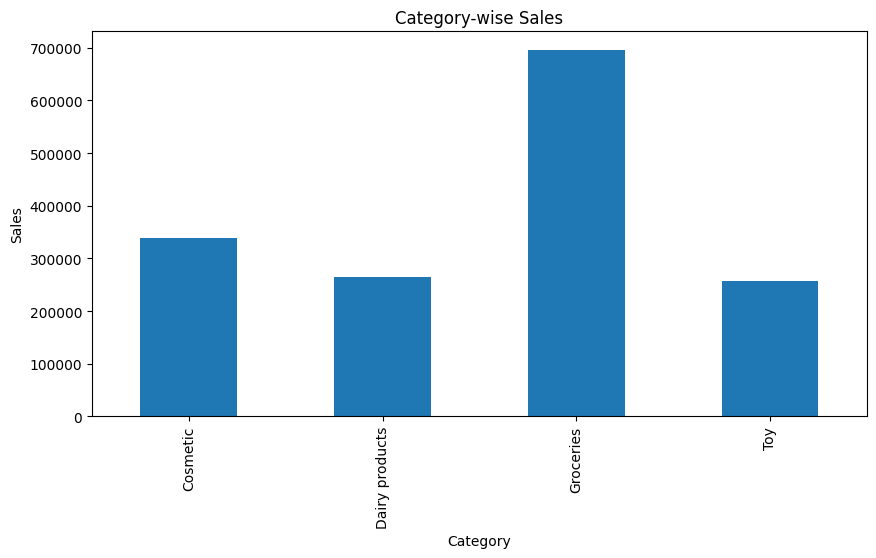

In [157]:
#Visualization
plt.figure(figsize=(10,5))
df.groupby('category')['total_amount'].sum().plot(kind='bar')
plt.title("Category-wise Sales")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

In [158]:
#among all category groceries has the highest sales

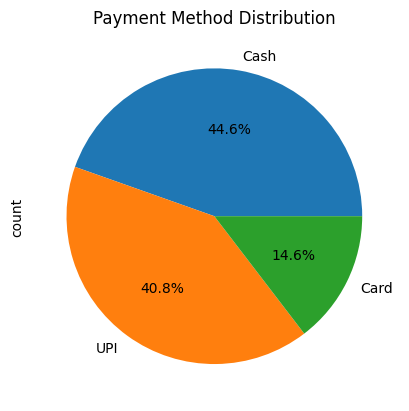

In [159]:
df['payment_method'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Payment Method Distribution")
plt.show()

In [160]:
#highest percentage of payment method is Cash

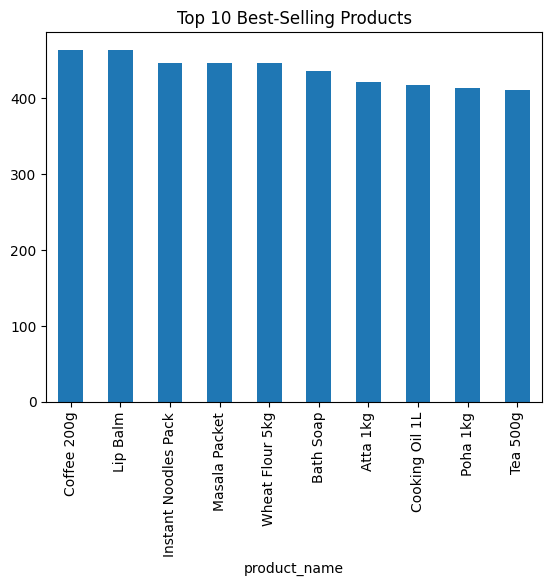

In [161]:
df.groupby('product_name')['quantity'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Best-Selling Products")
plt.show()

In [162]:
#top 10 best selling products are ----coffee, lip balm,noodles,masalapacket,wheat flour,bathsoap,atta,cooking oil, poha,tea

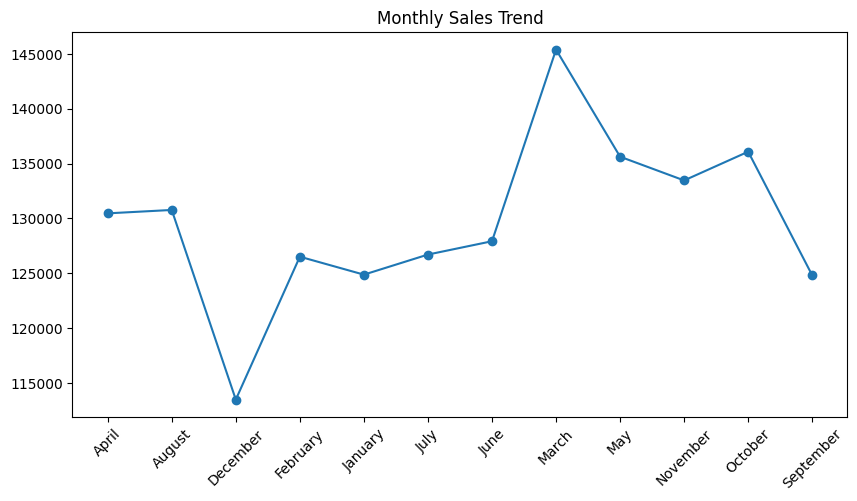

In [163]:
monthly_sales = df.groupby('month')['total_amount'].sum()

plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.show()

In [164]:
## Best monthly sales is on March

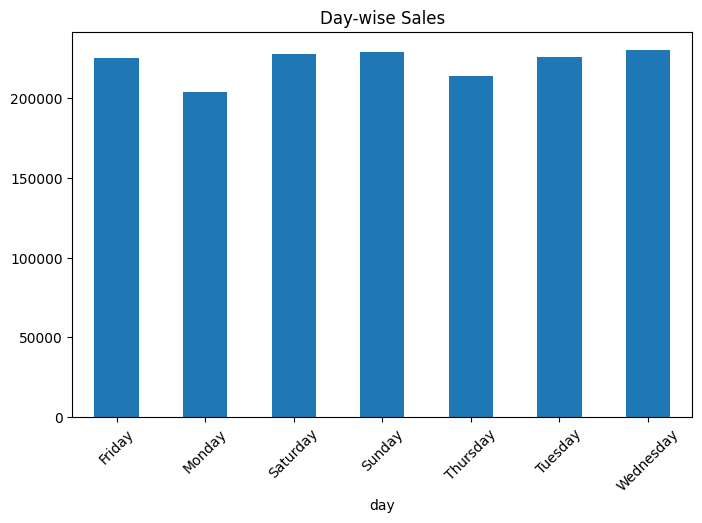

In [165]:
day_sales = df.groupby('day')['total_amount'].sum()

plt.figure(figsize=(8,5))
day_sales.plot(kind='bar')
plt.title("Day-wise Sales")
plt.xticks(rotation=45)
plt.show()

In [169]:
## 📌 – Day-wise Sales
## Saturday has the highest sales, meaning weekends bring more footfall.
##Monday and Tuesday show low revenue, indicating slow business days.


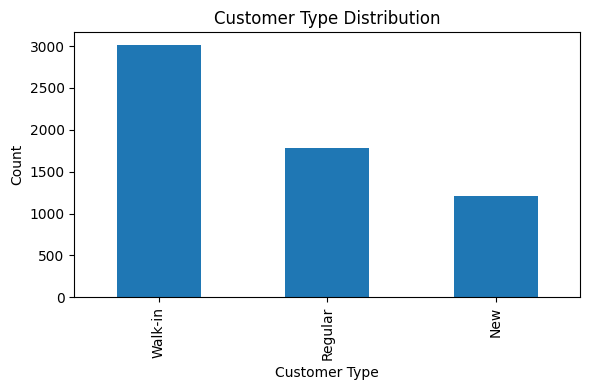

In [170]:
plt.figure(figsize=(6,4))
customer_counts.plot(kind='bar')
plt.title("Customer Type Distribution")
plt.xlabel("Customer Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

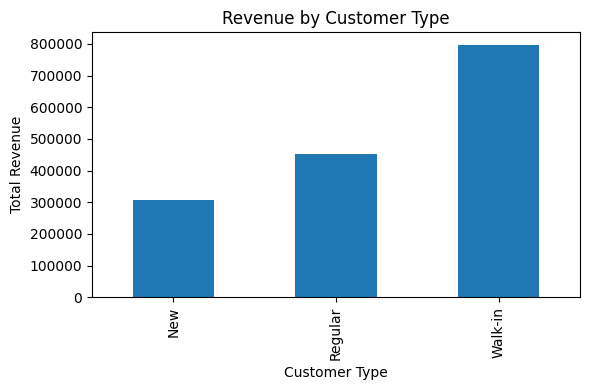

In [171]:
plt.figure(figsize=(6,4))
revenue_by_customer.plot(kind='bar')
plt.title("Revenue by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

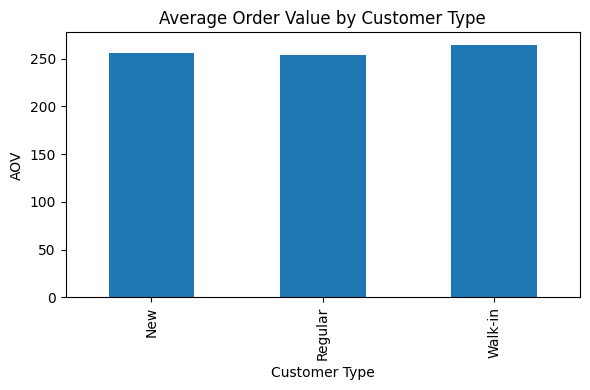

In [172]:
plt.figure(figsize=(6,4))
aov_by_customer.plot(kind='bar')
plt.title("Average Order Value by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("AOV")
plt.tight_layout()
plt.show()

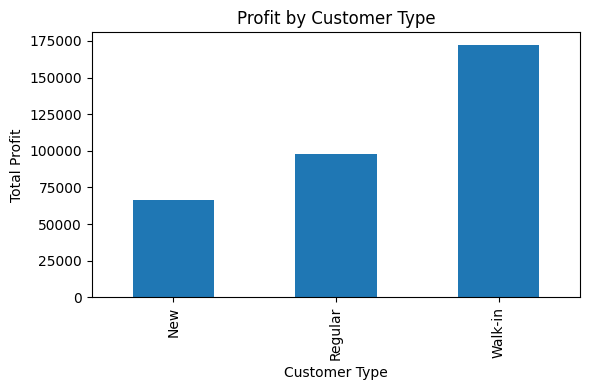

In [173]:
plt.figure(figsize=(6,4))
profit_by_customer.plot(kind='bar')
plt.title("Profit by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.show()

In [175]:
## 🧠 Customer Type Insights

### 1️⃣ Customer Distribution
# Walk-in customers are the majority compared to new customers.
# This indicates strong local footfall.

### 2️⃣ Average Order Value (AOV)
# New customers have lower AOV than walk-ins.
# Suggests that walk-in customers spend more per visit.

### 3️⃣ Revenue Contribution
# Walk-ins contribute more revenue then new customer.

### 4️⃣ Profit Contribution
# Most profits come from Walk-in customers.
# Marketing strategy can target this segment.

### 5️⃣ Business Recommendation
#Offer loyalty points to walk-in customers.
# Give small welcome discounts to new customers to convert them into repeat buyers.


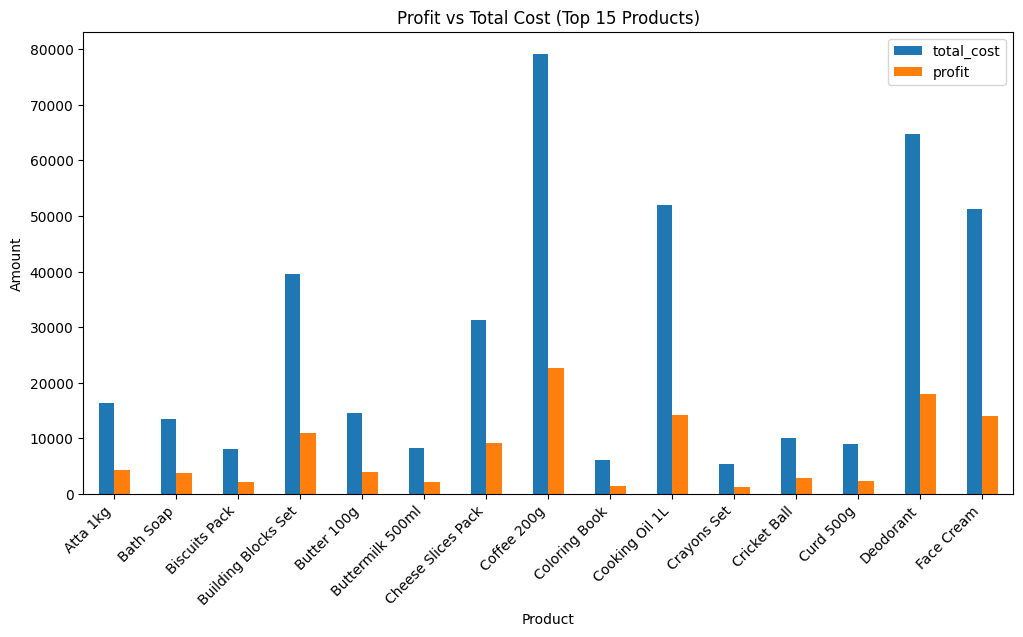

In [176]:
profit_cost = df.groupby("product_name")[["total_cost","profit"]].sum().head(15)

profit_cost.plot(kind="bar", figsize=(12,6))
plt.title("Profit vs Total Cost (Top 15 Products)")
plt.xlabel("Product")
plt.ylabel("Amount")
plt.xticks(rotation=45, ha="right")
plt.show()

In [179]:
### Insight – Profit vs Total Cost
# Some products have high cost but very low profit → reduce or replace them.
# Products where profit bars are much higher than cost bars are the most beneficial.


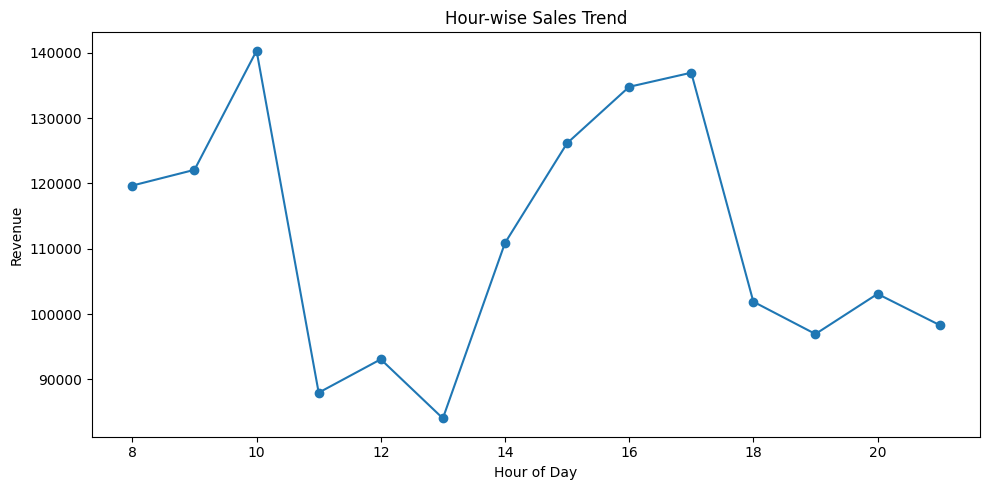

Peak Hour: 10


In [180]:
hour_sales = df.groupby('hour')['total_amount'].sum()

plt.figure(figsize=(10,5))
plt.plot(hour_sales.index, hour_sales.values, marker='o')
plt.title("Hour-wise Sales Trend")
plt.xlabel("Hour of Day")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

# INSIGHT
print("Peak Hour:", hour_sales.idxmax())

In [138]:
### peak hour of sales at 10 am and less at 1pm....